# Detection of Bow-tie structure in directed networks
This is a python implementation of the algorithm for the detection of a bow-tie structure in directed networks as defined in the paper: *"Bow-tie Decomposition in Directed Graphs" - Yang et al. IEEE (2011)*

In [1]:
import networkx as nx
import numpy as np

# For diplaying figures within the notebook we require: MatPlotLib
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_bowtie_components(graph):
    '''Classifying the nodes of a network into a bow-tie structure.
    Here we follow the paper: 
    "Bow-tie Decomposition in Directed Graphs" - Yang et al. IEEE (2011) 
    
    input:  NetworkX directed graph or numpy adjacency matrix
    output: sets of nodes in the specified partitions (following the 
            NetworkX input graph node labelling or labelled according to
            the order of the adjacency matrix [0, n-1])
    '''
    import networkx as nx
    
    # Verify graph input format
    input_formats = [nx.DiGraph, np.ndarray, np.matrix]
    assert type(graph) in input_formats, 'Input should be a NetworkX directed graph or numpy adjacency matrix'
    if type(graph) == nx.classes.digraph.DiGraph:
        G = graph.copy()
    if (type(graph) == np.ndarray) | (type(graph) == np.matrix):
        G = nx.from_numpy_matrix(np.matrix(graph), create_using=nx.DiGraph())
    
    GT = nx.reverse(G, copy=True)
    
    strongly_con_comp = list(nx.strongly_connected_components(G))    
    strongly_con_comp = max(strongly_con_comp, key=len)

    S = strongly_con_comp

    v_any = list(S)[0]
    DFS_G = set(nx.dfs_tree(G,v_any).nodes())
    DFS_GT = set(nx.dfs_tree(GT,v_any).nodes())
    OUT = DFS_G - S
    IN = DFS_GT - S
    V_rest = set(G.nodes()) - S - OUT - IN

    TUBES = set()
    INTENDRILS = set()
    OUTTENDRILS = set()
    OTHER = set()
    for v in V_rest:
        irv = len(IN & set(nx.dfs_tree(GT,v).nodes())) is not 0
        vro = len(OUT & set(nx.dfs_tree(G,v).nodes())) is not 0
        if irv and vro:
            TUBES.add(v)
        elif irv and not vro:
            INTENDRILS.add(v)
        elif not irv and vro:
            OUTTENDRILS.add(v)
        elif not irv and not vro:
            OTHER.add(v)
            
    return S, IN, OUT, TUBES, INTENDRILS, OUTTENDRILS, OTHER

# Random graph example

In [3]:
def get_node_colors(G):
    [S, IN, OUT, TUBES, INTENDRILS, OUTTENDRILS, OTHER] = get_bowtie_components(G)
    node_colors = []
    for i, node in enumerate(G.nodes):
        if node in IN:
            node_colors.append('blue')
        elif node in S:
            node_colors.append('red')
        elif node in OUT:
            node_colors.append('green')
        else:
            node_colors.append('grey')
    return node_colors

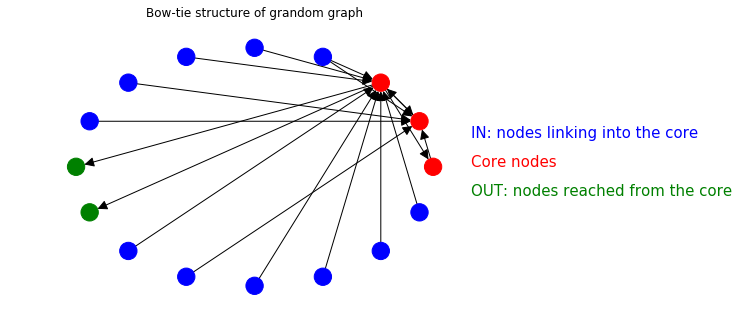

In [4]:
G = nx.DiGraph(nx.scale_free_graph(16, seed=14))

node_colors = get_node_colors(G)

nx.draw_shell(G, node_color=node_colors, arrowsize=20)
plt.title('Bow-tie structure of grandom graph')
plt.figtext(1, 0.6, "IN: nodes linking into the core", fontsize=15, color='blue')
plt.figtext(1, 0.5, "Core nodes", fontsize=15, color='red')
plt.figtext(1, 0.4, 'OUT: nodes reached from the core', fontsize=15, color='green')
plt.show()